# Importing necessary libreries.

In [1]:
#impprting necesaary libraries
import numpy as np
import pandas as pd
import keras
from keras.utils import np_utils
from matplotlib import pyplot as plt
from PIL import Image
import seaborn as sns
from matplotlib.pyplot import imshow
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


Converting keras backend from tensorflow to theano.

In [2]:
#changing keras backend to theano
import os
os.environ['KERAS_BACKEND']='theano'

# Loading training and test data.

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

Modifying training set to remove column which is to be predicted.

In [4]:
#splitiing training data into features and required output
train_y=train['label']
train_x=train.drop(labels=['label'],axis=1)

In [5]:
train_x

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Seeing distribution of labels.

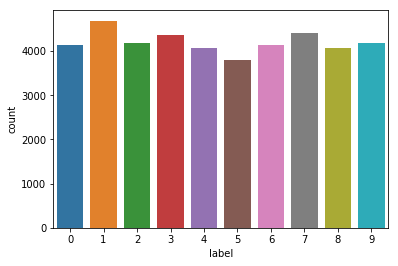

In [6]:
#plotting counts of different lables.
g=sns.countplot(train_y)

# Checking if any null value is presnet or not.

In [7]:
#checking for null valuess in train_x
train_x.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [8]:
#similaryly checking null values in test
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

Clearly we observe that we are not getting any null valiues in both the data set.

# Normalizing the data.

In [9]:
#noramalizing both the data set.
train_x=train_x.astype('float32')
test=test.astype('float32')

train_x=train_x/255.0
test=test/255.0

In [12]:
train_x.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We normalize our dataset it is so because CNN conevregs easily int the range 0-1 rather then 0-255.

Since we have observe that images are present in only single row,so now coverting images in 3D forms.

# Reshaping the train and test data into 3D form.

In [13]:
#Reshaping images in 3D form.
train_x=train_x.values.reshape(-1,28,28,1)
test=test.values.reshape(-1,28,28,1)

# Observing the shape of reshaped images.

In [14]:
#since given data set have grey images so we have reshape it into single channel image.
print("Shape of image in traintset: {}".format(train_x[0].shape))
print("shape of image in testset: {}".format(test[0].shape))

Shape of image in traintset: (28, 28, 1)
shape of image in testset: (28, 28, 1)


# Plotting grid of 3*3 images.

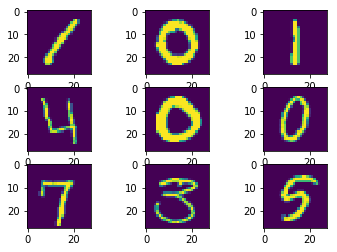

In [15]:
#plotting grid of 3*3 image in order to description of images
from matplotlib.pyplot import imshow
g = plt.imshow(train_x[0][:,:,0])
for i in range(0,9):
    plt.subplot(330+1+i)
    g = plt.imshow(train_x[i][:,:,0])

# Converting labels to categorical format.

In [16]:
#converting labels into categorical form
train_y=np_utils.to_categorical(train_y)
num_of_class=train_y.shape[1]


print("No of classes: {}".format(num_of_class))
print(train_y.shape)
print(train_y[0])

No of classes: 10
(42000, 10)
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


# Splitiing training set into validation set so that we can further check or model.

In [17]:
#splitting train_x and test into validation set so that we can check the accuracy of model after building.
random_seed=2
x_train,x_val,y_train,y_val=train_test_split(train_x,train_y,test_size=0.1,random_state=random_seed)

Observing shape of train and validation set.

In [18]:
#printing shape of x_train,x_test,x_val,y_val.
print("shape of x_train:{}".format(x_train.shape))
print("shape of x_val:{}".format(x_val.shape))
print("shape of y_train:{}".format(y_train.shape))
print("shape of y_val:{}".format(y_val.shape))

shape of x_train:(37800, 28, 28, 1)
shape of x_val:(4200, 28, 28, 1)
shape of y_train:(37800, 10)
shape of y_val:(4200, 10)


# Building model and creating different layers to it.

In [19]:
from keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,Activation
from keras.models import Sequential
from keras.optimizers import SGD,RMSprop

In [20]:
#defining fucntion for building model

def cnn(weights=None):
    
    #defining model type
    model=Sequential()
    
    #adding layers to model
    model.add(Conv2D(32,(5,5),padding='same',input_shape=(28,28,1)))
    model.add(Activation('relu'))
    
    model.add(Conv2D(32,(5,5),padding='same'))
    model.add(Activation('relu'))
    
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64,(3,3),padding='same'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(64,(3,3),padding='same'))
    model.add(Activation('relu'))
    
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.5))
              
    model.add(Dense(10,activation='softmax'))
    
    #loading pre trained weights if possible by transffer learning
    if weights:
        model.load_weights(weights)
              
    #returning model
    return model
    
              

In [21]:
model=cnn()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)  

# Defining Optimizer and compiling model with optimizer.

In [22]:
#defining optimizer
learning_rate=0.001
rho=0.9
epsilon=1e-08
decay=0.0

opt=RMSprop(lr=learning_rate,rho=rho,epsilon=epsilon,decay=decay)


In [23]:
#compiling optimizer
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=["accuracy"])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
__________

# Augmenting the data.

In [24]:
# With data augmentation to prevent overfitting
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False, 
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1, 
        horizontal_flip=False,  
        vertical_flip=False)  


datagen.fit(x_train)


# Fitting the model.

In [25]:
epochs=5
batch_size=100

#fitting the model
model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
37800/37800 [==============================] - 241s 6ms/step - loss: 0.2577 - acc: 0.9178
Epoch 2/5
37800/37800 [==============================] - 224s 6ms/step - loss: 0.0766 - acc: 0.9778
Epoch 3/5
37800/37800 [==============================] - 222s 6ms/step - loss: 0.0553 - acc: 0.9828
Epoch 4/5
37800/37800 [==============================] - 222s 6ms/step - loss: 0.0444 - acc: 0.9865
Epoch 5/5
37800/37800 [==============================] - 223s 6ms/step - loss: 0.0402 - acc: 0.9879


In [26]:
#testing the model on validation set
scores=model.evaluate(x_val,y_val,verbose=1)
print("Acuracy: {}".format(scores[1]))

4200/4200 [==============================] - 9s 2ms/step
Acuracy: 0.9911904761904762


# Gained an accuracy of 99.19% on validation set.

In [27]:
#predicting on test data
predictions=model.predict(test)

In [43]:
predictions

array([[6.3709465e-10, 6.5154893e-10, 9.9999988e-01, ..., 3.9304467e-08,
        9.5352046e-09, 3.9654630e-11],
       [9.9999964e-01, 7.8064326e-12, 2.1790980e-08, ..., 5.7328498e-09,
        6.1002248e-09, 2.2868742e-08],
       [2.5114727e-10, 1.8105001e-09, 1.4634866e-08, ..., 1.9136813e-07,
        1.1318956e-05, 9.9996829e-01],
       ...,
       [1.0831739e-14, 1.0127523e-09, 2.5231572e-10, ..., 2.1818476e-08,
        1.4367725e-09, 1.5305452e-09],
       [6.3826708e-09, 4.4532227e-09, 5.2761417e-09, ..., 7.4588224e-06,
        1.1473654e-06, 9.9981624e-01],
       [7.5295742e-12, 3.7700974e-11, 1.0000000e+00, ..., 3.5288439e-09,
        5.8172841e-08, 1.7876948e-11]], dtype=float32)

In [47]:
predictions =np.argmax(predictions,axis=-1)

In [48]:
predictions

array([2, 0, 9, ..., 3, 9, 2])

In [49]:
predictions = pd.Series(predictions,name="Label")

In [50]:
predictions

0        2
1        0
2        9
3        0
4        3
5        7
6        0
7        3
8        0
9        3
10       5
11       7
12       4
13       0
14       4
15       3
16       3
17       1
18       9
19       0
20       9
21       1
22       1
23       5
24       7
25       4
26       2
27       7
28       4
29       7
        ..
27970    5
27971    0
27972    4
27973    8
27974    0
27975    3
27976    6
27977    0
27978    1
27979    9
27980    3
27981    1
27982    1
27983    0
27984    4
27985    5
27986    2
27987    2
27988    9
27989    6
27990    7
27991    6
27992    1
27993    9
27994    7
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64

In [53]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),predictions],axis = 1)

submission.to_csv("digit_recognizer_submit.csv",index=False)